<a href="https://colab.research.google.com/github/hector6298/Deep-Learning-Collab-notebooks/blob/master/EEG_subject_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import os
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive, files
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/EEG"
files = os.listdir(path)

##Read a sample File

In [ ]:
df = pd.read_csv("/content/drive/My Drive/EEG/F001-01G10.CSV")
df = df[128-int(df['timestamp'].iloc[0]-1):]
df

,timestamp,N,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,ch10,ch11,ch12,ch13,ch14,l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,l13,l14,l15,l16,l17,l18,l19,l20
93,0.0,0.0,4459.999891,4719.999885,4676.410142,4263.076819,4473.846044,4751.281935,4753.846038,4364.102457,4683.589629,4277.435793,4568.205016,4231.794768,4278.461434,4228.717845,203.0,0.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,1667.0,1706.0,0.0
94,1.0,0.0,4458.461429,4721.025526,4678.974245,4263.076819,4471.794762,4748.717833,4751.794756,4365.640919,4702.051167,4263.076819,4571.281939,4241.538358,4284.102459,4230.769127,450.0,0.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,1665.0,1707.0,0.0
95,2.0,0.0,4458.974250,4717.435782,4678.461424,4261.538357,4465.640916,4751.794756,4750.256294,4357.435791,4697.948603,4263.589639,4570.256298,4239.999896,4284.102459,4236.922973,0.0,0.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,1666.0,1706.0,0.0
96,3.0,0.0,4461.025532,4716.410141,4675.384501,4262.563998,4468.717839,4747.179371,4748.717833,4355.897329,4687.179373,4257.948614,4569.743478,4233.333230,4280.512716,4230.256307,480.0,0.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,1666.0,1707.0,0.0
97,4.0,0.0,4461.538352,4718.461423,4673.333219,4262.051178,4471.281942,4733.333218,4744.102448,4353.846047,4676.410142,4252.820409,4570.769119,4232.820409,4278.974254,4219.487076,445.0,0.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,1665.0,1706.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,74.0,0.0,4468.205019,4785.128088,4722.051167,4236.922973,4481.538352,4751.281935,4766.666550,4350.769124,4687.179373,4261.538357,4520.512710,4263.589639,4354.358868,4266.153742,362.0,0.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,1663.0,1697.0,0.0
42996,75.0,0.0,4467.692198,4780.512704,4719.999885,4228.717845,4468.205019,4743.589628,4754.358858,4350.769124,4683.589629,4251.794768,4522.051171,4259.487075,4352.307586,4261.538357,365.0,0.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,1662.0,1698.0,0.0
42997,76.0,0.0,4468.205019,4781.538345,4716.922962,4232.307589,4454.358865,4740.512705,4748.205012,4356.410150,4681.025527,4250.769127,4522.563992,4256.922973,4347.179381,4261.538357,257.0,0.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,1663.0,1698.0,0.0
42998,77.0,0.0,4466.153737,4781.025524,4713.846039,4233.333230,4458.461429,4738.974243,4758.974243,4358.461432,4685.640911,4264.102460,4521.538351,4260.512716,4352.307586,4264.615280,364.0,0.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,1662.0,1699.0,0.0


In [ ]:
df = df.iloc[:,2:16]
df

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,ch10,ch11,ch12,ch13,ch14
93,4459.999891,4719.999885,4676.410142,4263.076819,4473.846044,4751.281935,4753.846038,4364.102457,4683.589629,4277.435793,4568.205016,4231.794768,4278.461434,4228.717845
94,4458.461429,4721.025526,4678.974245,4263.076819,4471.794762,4748.717833,4751.794756,4365.640919,4702.051167,4263.076819,4571.281939,4241.538358,4284.102459,4230.769127
95,4458.974250,4717.435782,4678.461424,4261.538357,4465.640916,4751.794756,4750.256294,4357.435791,4697.948603,4263.589639,4570.256298,4239.999896,4284.102459,4236.922973
96,4461.025532,4716.410141,4675.384501,4262.563998,4468.717839,4747.179371,4748.717833,4355.897329,4687.179373,4257.948614,4569.743478,4233.333230,4280.512716,4230.256307
97,4461.538352,4718.461423,4673.333219,4262.051178,4471.281942,4733.333218,4744.102448,4353.846047,4676.410142,4252.820409,4570.769119,4232.820409,4278.974254,4219.487076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,4468.205019,4785.128088,4722.051167,4236.922973,4481.538352,4751.281935,4766.666550,4350.769124,4687.179373,4261.538357,4520.512710,4263.589639,4354.358868,4266.153742
42996,4467.692198,4780.512704,4719.999885,4228.717845,4468.205019,4743.589628,4754.358858,4350.769124,4683.589629,4251.794768,4522.051171,4259.487075,4352.307586,4261.538357
42997,4468.205019,4781.538345,4716.922962,4232.307589,4454.358865,4740.512705,4748.205012,4356.410150,4681.025527,4250.769127,4522.563992,4256.922973,4347.179381,4261.538357
42998,4466.153737,4781.025524,4713.846039,4233.333230,4458.461429,4738.974243,4758.974243,4358.461432,4685.640911,4264.102460,4521.538351,4260.512716,4352.307586,4264.615280


##Shape of the values (timesteps, channels)

In [ ]:
subject_raw = df.values
print(subject_raw.shape)
sample_rate = 129
channels = 14
splits = subject_raw.shape[0] // sample_rate
subject = np.zeros((splits,sample_rate, channels))

(42907, 14)


In [ ]:
idx = 0
for i in range(splits):
  subject[i] = subject_raw[idx*sample_rate:(idx+1)*sample_rate]
subject.shape

(332, 129, 14)

##All Subjects

In [ ]:
num_subjs = len(files)
subjects = np.zeros((16834,sample_rate, channels), dtype=np.float32)
labels = np.zeros((16834,), dtype=np.int32)
j = 0
subj_label = 0
for file in files:
  df = pd.read_csv(f"{path}/{file}")
  df = df[128-int(df['timestamp'].iloc[0]-1):]
  df = df.iloc[:,2:16]
  subject_raw = df.values
  sample_rate = 129
  channels = 14
  splits = subject_raw.shape[0] // sample_rate
  idx = 0
  for i in range(splits):
    subjects[j] = subject_raw[idx*sample_rate:(idx+1)*sample_rate]
    labels[j] = subj_label
    j += 1
  subj_label += 1

In [ ]:
p = np.random.permutation(len(labels))
subjects = subjects[p]
labels = labels[p]

In [ ]:
subjects_train = np.zeros((int(16834*0.8),sample_rate, channels), dtype=np.float32)
labels_train = np.zeros((int(16834*0.8),), dtype=np.int32)
subjects_test = np.zeros((int(6834*0.2),sample_rate, channels), dtype=np.float32)
labels_test = np.zeros((int(16834*0.2),), dtype=np.int32)

subjects_train = subjects[:int(16834*0.8)]
subjects_test = subjects[int(16834*0.8):]
labels_train = labels[:int(16834*0.8)]
labels_test = labels[int(16834*0.8):]

In [ ]:
for label in range(num_subjs):
  if len(labels_test[labels_test == label]) == 0:
    print(f"Error, no subj {label} in labels_test")
  if len(labels_train[labels_train == label]) == 0:
    print(f"Error, no subj {label} in labels_train")
    

##train and test

In [ ]:
!cp -r "/content/drive/My Drive/timeception" /content
from timeception import timeception

In [ ]:
BATCH_SIZE=100
SHUFFLE=True
LEARNING_RATE=0.001

In [ ]:
dataset_train = tf.data.Dataset.from_tensor_slices((subjects_train,labels_train))
dataset_train = dataset_train.batch(BATCH_SIZE).shuffle(10000).prefetch(tf.data.experimental.AUTOTUNE)
dataset_train

<PrefetchDataset shapes: ((None, 129, 14), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
dataset_test = tf.data.Dataset.from_tensor_slices((subjects_test,labels_test))
dataset_test = dataset_test.batch(BATCH_SIZE).shuffle(10000).prefetch(tf.data.experimental.AUTOTUNE)
dataset_test

<PrefetchDataset shapes: ((None, 129, 14), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
model = timeception.construct_classifier((129,14),num_classes=51)
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 129, 14)]    0                                            
__________________________________________________________________________________________________
stem_module_1 (StemModule)      (None, 65, 28)       20440       input_2[0][0]                    
__________________________________________________________________________________________________
inception_module_9 (InceptionMo (None, 65, 27)       16214       stem_module_1[0][0]              
__________________________________________________________________________________________________
inception_module_10 (InceptionM (None, 65, 27)       16186       inception_module_9[0][0]         
_______________________________________________________________________________________

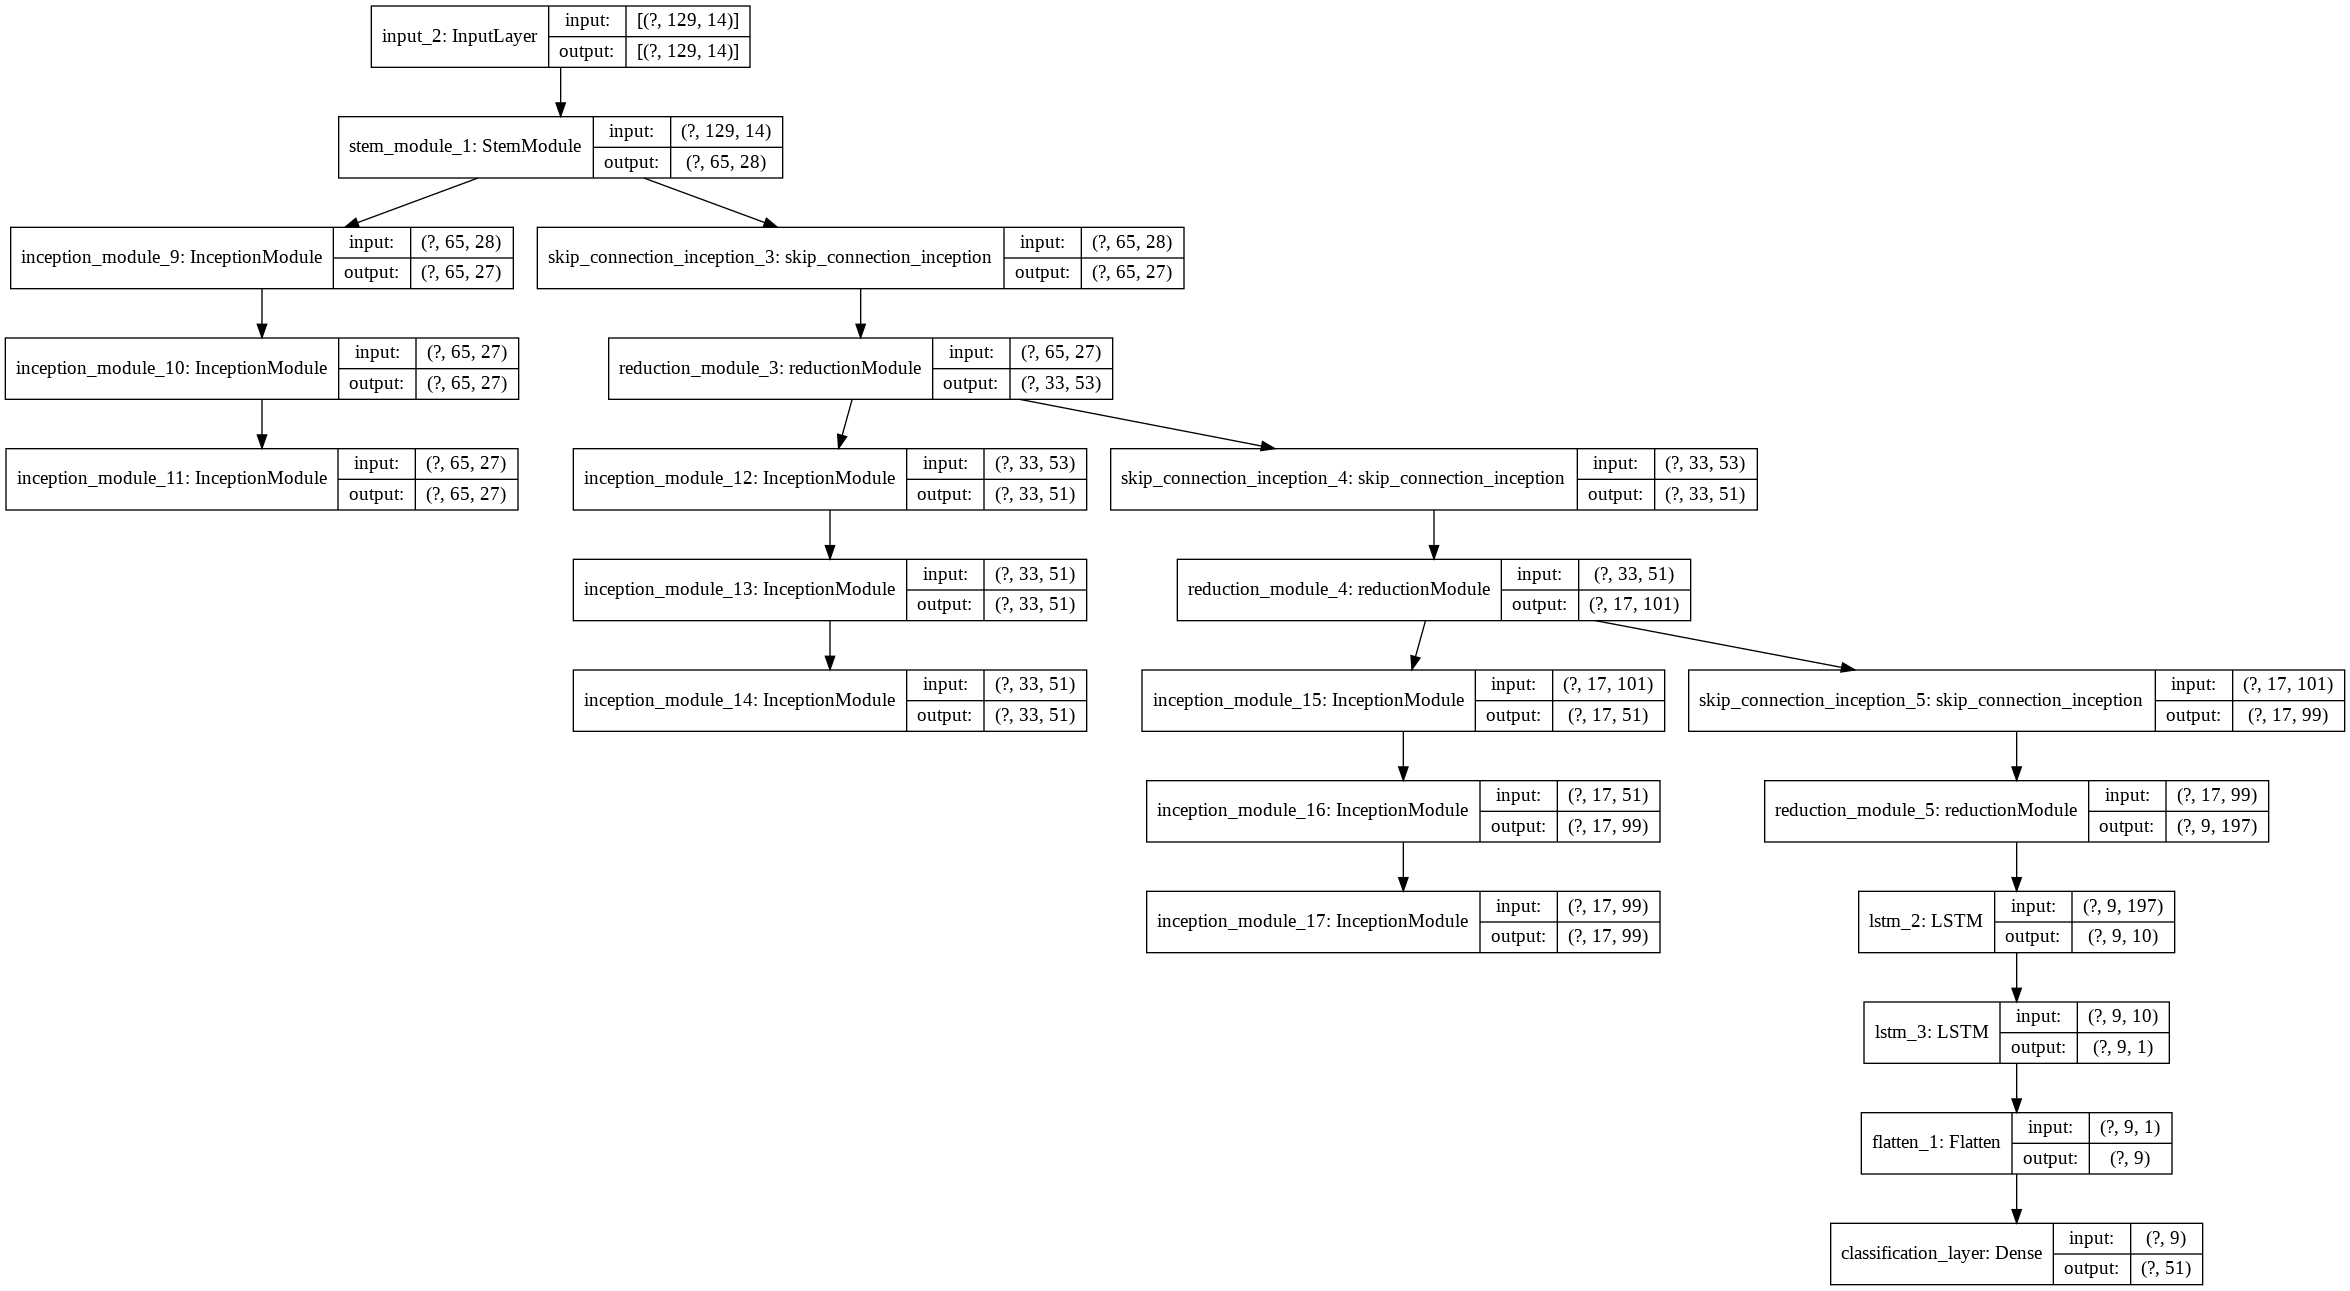

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
checkpoint_filepath = '/content/drive/My Drive/tmpEEG/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='auto',
    save_best_only=False)

In [ ]:
model_history = model.fit(x=dataset_train,
                          epochs=60,
                          validation_data=dataset_test,
                          verbose=1,
                          callbacks=[model_checkpoint_callback])

Epoch 1/60
135/135 [==============================] - 143s 1s/step - loss: 3.5693 - accuracy: 0.1121 - val_loss: 3.9263 - val_accuracy: 0.0000e+00
Epoch 2/60
135/135 [==============================] - 142s 1s/step - loss: 2.8758 - accuracy: 0.3706 - val_loss: 3.8701 - val_accuracy: 0.0618
Epoch 3/60
135/135 [==============================] - 142s 1s/step - loss: 2.4986 - accuracy: 0.4813 - val_loss: 4.8296 - val_accuracy: 0.0220
Epoch 4/60
135/135 [==============================] - 142s 1s/step - loss: 2.1166 - accuracy: 0.6308 - val_loss: 4.2790 - val_accuracy: 0.0437
Epoch 5/60
135/135 [==============================] - 141s 1s/step - loss: 1.8754 - accuracy: 0.6853 - val_loss: 4.9563 - val_accuracy: 0.0220
Epoch 6/60
135/135 [==============================] - 141s 1s/step - loss: 1.6592 - accuracy: 0.7375 - val_loss: 5.0793 - val_accuracy: 0.0220
Epoch 7/60
135/135 [==============================] - 143s 1s/step - loss: 1.4184 - accuracy: 0.7925 - val_loss: 4.1690 - val_accuracy: 0.

In [ ]:
from tensorflow.keras.layers import Layer, Conv1D, MaxPool1D, Concatenate, BatchNormalization, AveragePooling1D, Input, LSTM, Flatten, Add, Dense
from tensorflow.keras import activations, Model

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
trivial_model = tf.keras.Sequential([
                                     Conv1D(filters=64,strides=1, kernel_size=3, activation='relu'),
                                     MaxPool1D(pool_size=3,strides=2, padding='same'),
                                     Conv1D(filters=64,strides=1, kernel_size=5,activation='relu'),
                                     Flatten(),
                                     Dense(51, activation='softmax')
])

In [ ]:
trivial_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


In [ ]:
trivial_model_history = trivial_model.fit(x=dataset_train,
                          epochs=60,
                          validation_data=dataset_test,
                          verbose=1,
                          )

Epoch 1/60
135/135 [==============================] - 6s 45ms/step - loss: 352.3670 - accuracy: 0.0199 - val_loss: 3.9322 - val_accuracy: 0.0172
Epoch 2/60
135/135 [==============================] - 6s 43ms/step - loss: 3.9320 - accuracy: 0.0180 - val_loss: 3.9325 - val_accuracy: 0.0172
Epoch 3/60
135/135 [==============================] - 6s 43ms/step - loss: 3.9319 - accuracy: 0.0192 - val_loss: 3.9327 - val_accuracy: 0.0172
Epoch 4/60
135/135 [==============================] - 6s 43ms/step - loss: 3.9319 - accuracy: 0.0192 - val_loss: 3.9330 - val_accuracy: 0.0172
Epoch 5/60
135/135 [==============================] - 6s 43ms/step - loss: 3.9318 - accuracy: 0.0175 - val_loss: 3.9332 - val_accuracy: 0.0146
Epoch 6/60
135/135 [==============================] - 6s 43ms/step - loss: 3.9318 - accuracy: 0.0186 - val_loss: 3.9335 - val_accuracy: 0.0172
Epoch 7/60
135/135 [==============================] - 6s 43ms/step - loss: 3.9317 - accuracy: 0.0186 - val_loss: 3.9337 - val_accuracy: 0.01

In [ ]:
def plot_metrics(model_history):

  loss = model_history.history['loss']
  val_loss = model_history.history['val_loss']

  iou = model_history.history['accuracy']
  val_iou = model_history.history['val_accuracy']
  epochs = range(60)
  fig, axs = plt.subplots(2)

  axs[0].plot(epochs, loss, 'r', label='Training loss')
  axs[0].plot(epochs, val_loss, 'bo', label='Validation loss')


  axs[1].plot(epochs, iou, 'r', label='Training acc')
  axs[1].plot(epochs, val_iou, 'bo', label='Validation acc')

  plt.legend()
  plt.show()


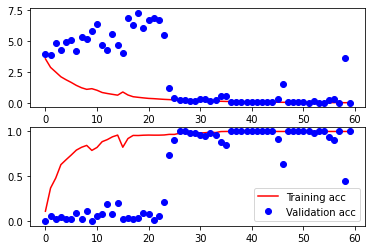

In [ ]:
plot_metrics(model_history)

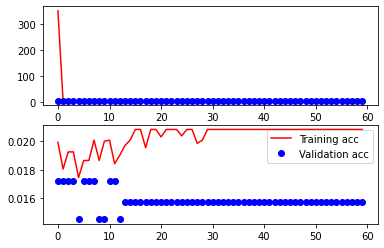

In [ ]:
plot_metrics(trivial_model_history)